In [7]:
pip install openpyxl

   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/251.3 kB 653.6 kB/s eta 0:00:01
   ------------------------------ --------- 194.6/251.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

data = pd.read_excel("cleaned_825220013_Sumenep_2000_2009.xlsx")

In [10]:
required_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Memeriksa apakah semua kolom yang diharapkan ada dalam data
if all(column in data.columns for column in required_columns):
    for column in required_columns:
        # Menghitung jumlah angka 0 di kolom saat ini
        jumlah_angka_0 = (data[column] == 0).sum()

        # Menghitung total jumlah data di kolom saat ini
        total_data = data[column].count()

        # Menghitung rasio angka 0
        if total_data > 0:
            rasio_angka_0 = jumlah_angka_0 / total_data
            print(f'Rasio angka 0 di kolom {column}: {rasio_angka_0:.2%}')
        else:
            print(f'Kolom {column} tidak memiliki data.')
else:
    missing_columns = [column for column in required_columns if column not in data.columns]
    print(f'Kolom berikut tidak ditemukan di file Excel: {", ".join(missing_columns)}')

Rasio angka 0 di kolom Tn: 0.00%
Rasio angka 0 di kolom Tx: 0.00%
Rasio angka 0 di kolom Tavg: 0.00%
Rasio angka 0 di kolom RH_avg: 0.00%
Rasio angka 0 di kolom ss: 6.88%
Rasio angka 0 di kolom ff_x: 0.03%
Rasio angka 0 di kolom ddd_x: 0.00%
Rasio angka 0 di kolom ff_avg: 2.55%


In [42]:
#melakukan penggantian nama kolom agar mudah dipahami
column_mapping = {
    "Tn": "Temperatur minimum (°C)",
    "Tx": "Temperatur maksimum (°C)",
    "Tavg": "Temperatur rata-rata (°C)",
    "RH_avg": "Kelembapan rata-rata (%)",
    "ss": "Lama penyinaran matahari (jam)",
    "ff_x": "Kecepatan angin maksimum (m/s)",
    "ff_avg": "Kecepatan angin rata-rata (m/s)",
    }

data.rename(columns=column_mapping)

,Date,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),RR,Lama penyinaran matahari (jam),Kecepatan angin maksimum (m/s),ddd_x,Kecepatan angin rata-rata (m/s),ddd_car,Tahun,Bulan,Hari
0,2000-01-01,25,31.8,28.7,84,0.0,7.4,7,315,3,W,2000,1,Saturday
1,2000-01-02,24,30.4,27.0,92,3.0,0.6,8,180,3,W,2000,1,Sunday
2,2000-01-03,24,31.1,27.0,88,0.0,1.9,8,225,2,W,2000,1,Monday
3,2000-01-04,25,31.8,27.8,89,0.0,0.0,4,180,1,NW,2000,1,Tuesday
4,2000-01-05,25,31.8,28.6,86,0.0,7.4,5,180,2,S,2000,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,2009-12-27,25,29.5,26.8,94,23.9,3.8,5,360,2,W,2009,12,Sunday
3569,2009-12-28,26,31.6,27.8,82,4.0,6.6,8,315,4,NW,2009,12,Monday
3570,2009-12-29,24,31.8,27.1,93,7.0,0.0,6,180,1,NW,2009,12,Tuesday
3571,2009-12-30,25,32.0,26.0,92,1.2,3.2,5,270,2,W,2009,12,Wednesday


In [13]:
data['Tahun'] = pd. DatetimeIndex(data ['Date']).year
data['Bulan'] = pd. DatetimeIndex(data ['Date']).month
data['Hari'] = data ['Date'].dt.day_name()

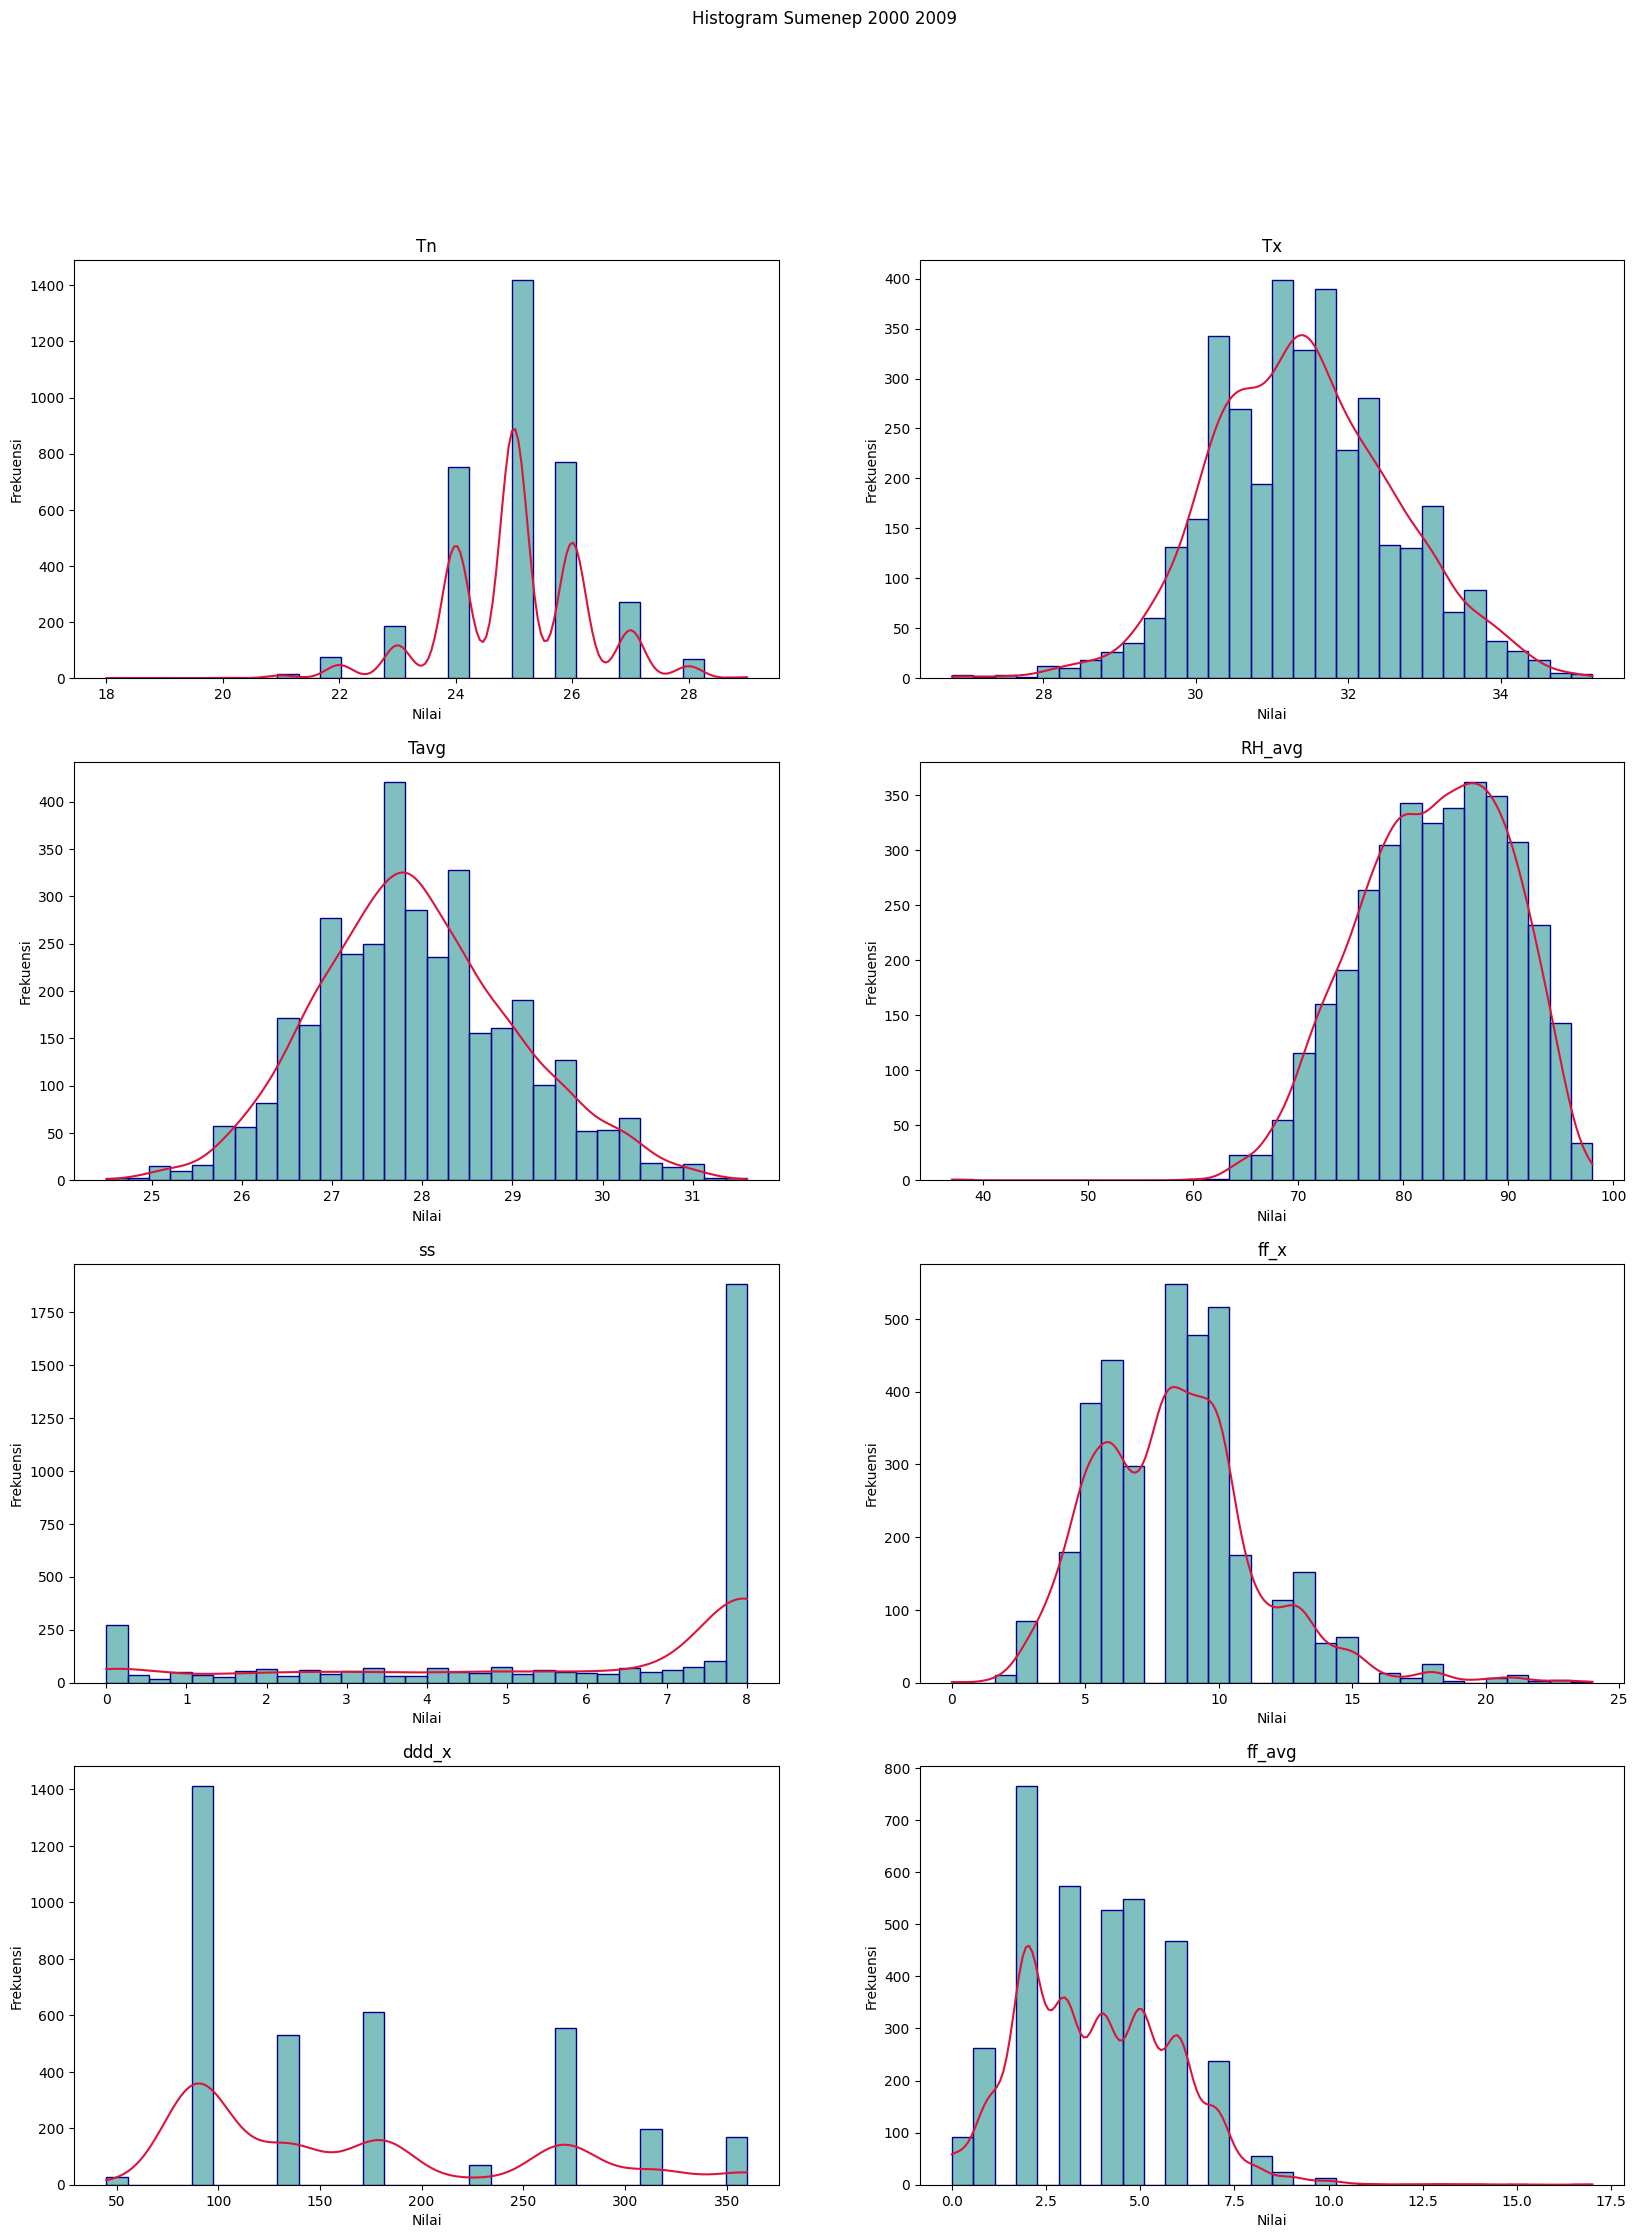

In [43]:
fig = plt.subplots (4, 2, figsize=(20,25))
plt.subplot(4, 2, 1)
ax = sns.histplot(data['Tn'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('Tn')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 2)
ax = sns.histplot(data['Tx'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('Tx')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 3)
ax = sns.histplot(data['Tavg'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('Tavg')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 4)
ax = sns.histplot(data['RH_avg'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('RH_avg')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 5)
ax = sns.histplot(data['ss'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('ss')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 6)
ax = sns.histplot(data['ff_x'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('ff_x')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 7)
ax = sns.histplot(data['ddd_x'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('ddd_x')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(4, 2, 8)
ax = sns.histplot(data['ff_avg'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('ff_avg')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.suptitle("Histogram Sumenep 2000 2009")
plt.show()

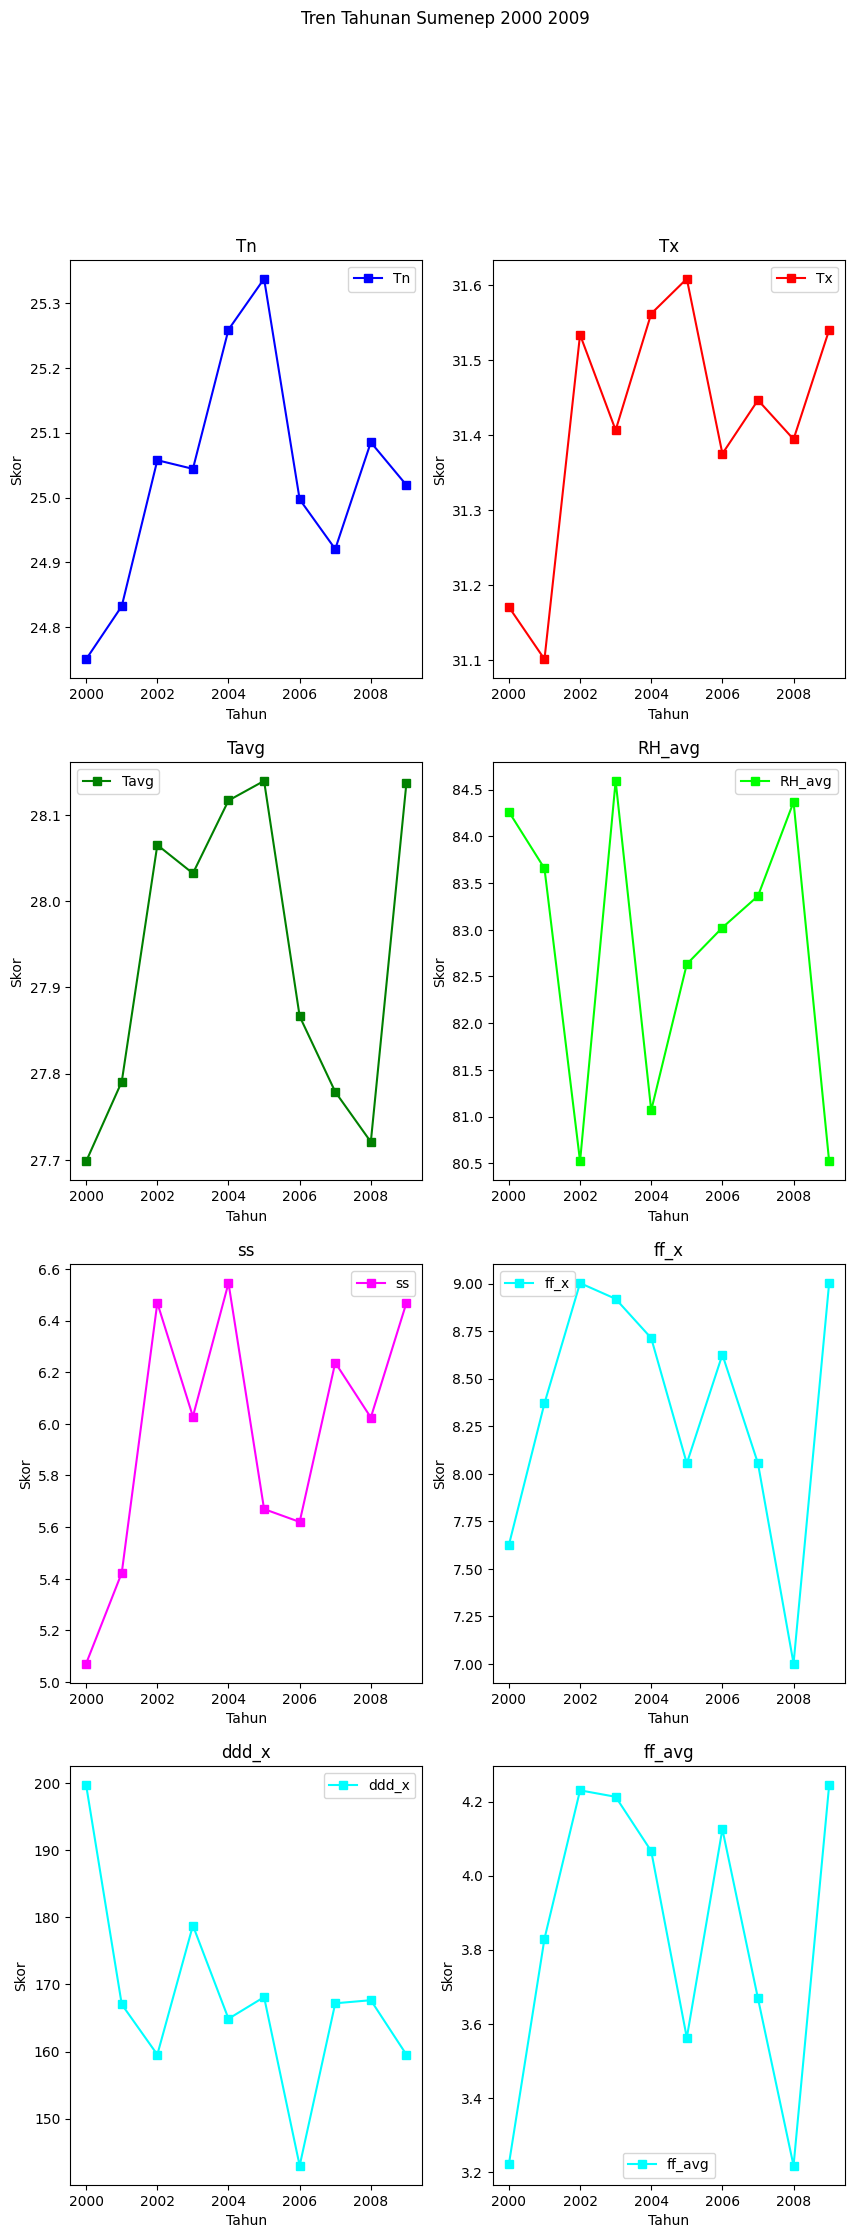

In [38]:
fig = plt.subplots (4, 2, figsize=(10,25))
plt.subplot(4, 2, 1)
data.groupby('Tahun') ['Tn'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.title('Tn')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 2)
data.groupby ('Tahun') ['Tx'].mean().plot(marker = 's', legend=True, color = 'red')
data.groupby('Tahun')
plt.title('Tx')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 3)
data.groupby ('Tahun') ['Tavg'].mean().plot(marker = 's', legend=True, color = 'green')
plt.title('Tavg')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 4)
data.groupby('Tahun') ['RH_avg'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.title('RH_avg')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 5)
data.groupby('Tahun') ['ss'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.title('ss')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 6)
data.groupby('Tahun') ['ff_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_x')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 7)
data.groupby('Tahun') ['ddd_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ddd_x')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(4, 2, 8)
data.groupby('Tahun') ['ff_avg'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_avg')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.suptitle("Tren Tahunan Sumenep 2000 2009")
plt.show()

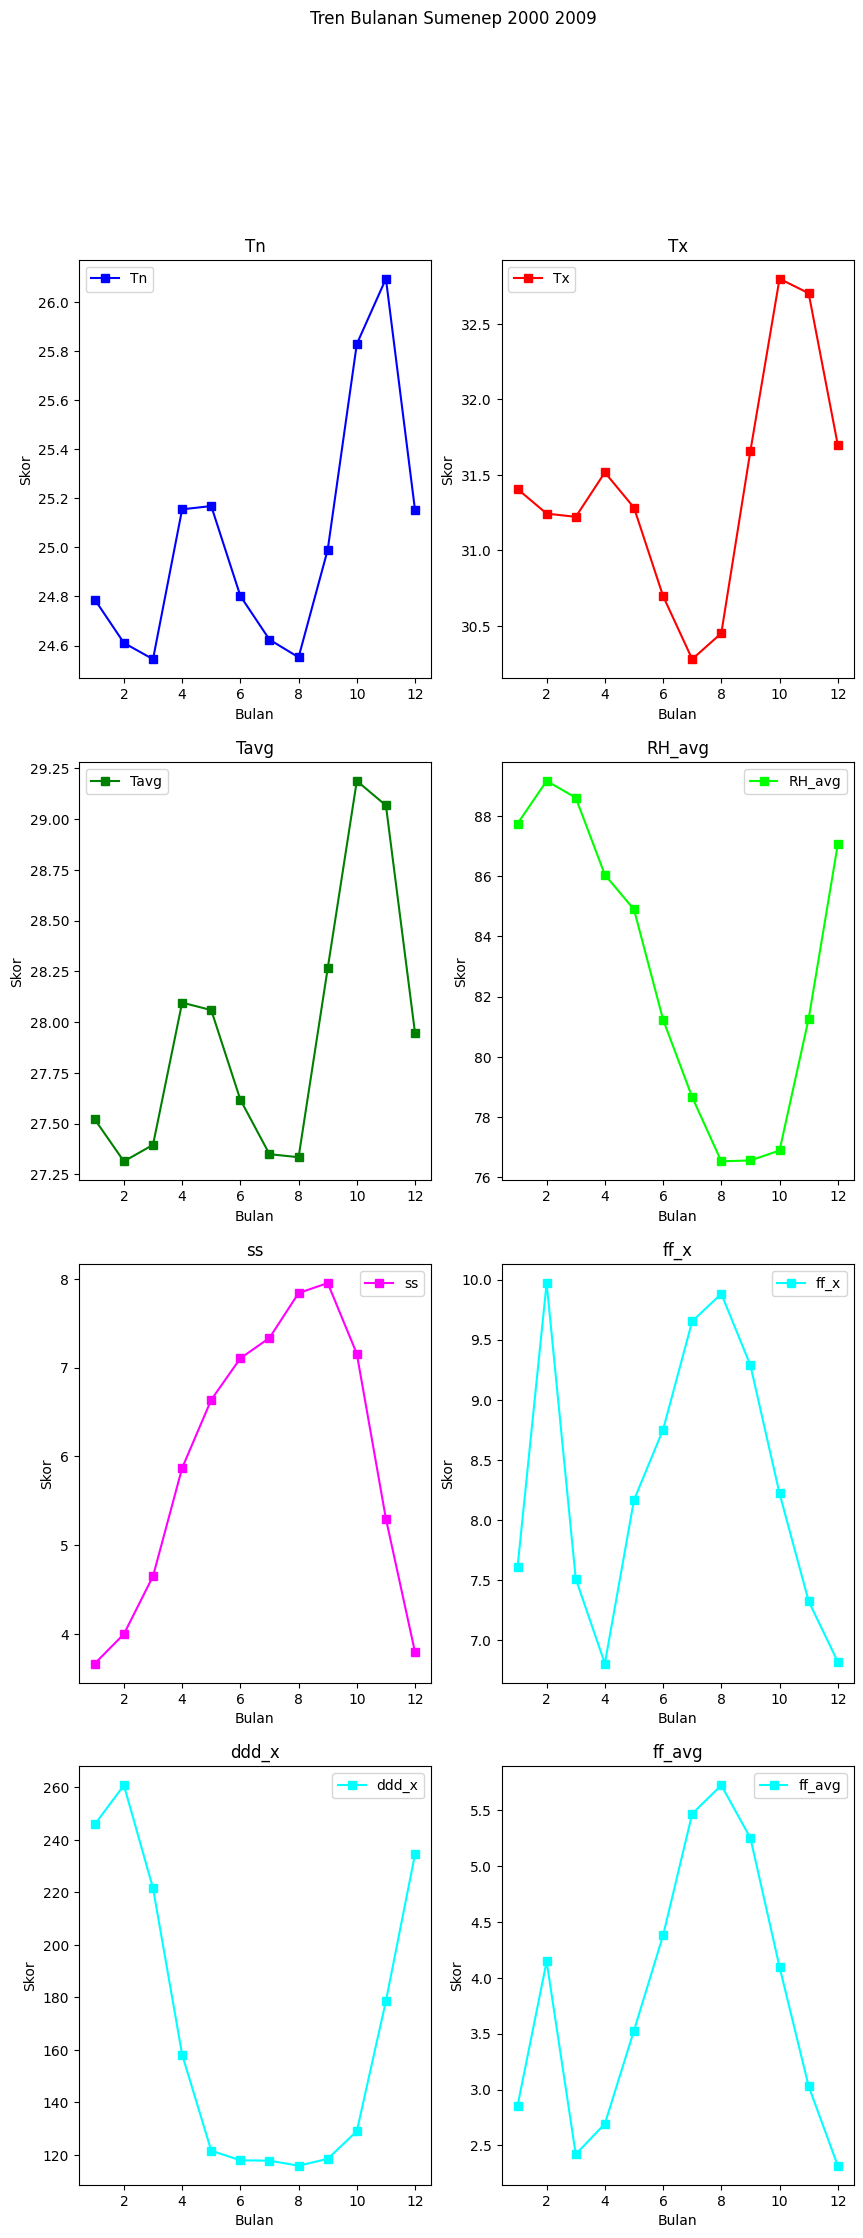

In [39]:
fig = plt.subplots (4, 2, figsize=(10,25))
plt.subplot(4, 2, 1)
data.groupby('Bulan') ['Tn'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.title('Tn')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 2)
data.groupby ('Bulan') ['Tx'].mean().plot(marker = 's', legend=True, color = 'red')
plt.title('Tx')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 3)
data.groupby ('Bulan') ['Tavg'].mean().plot(marker = 's', legend=True, color = 'green')
plt.title('Tavg')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 4)
data.groupby('Bulan') ['RH_avg'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.title('RH_avg')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 5)
data.groupby('Bulan') ['ss'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.title('ss')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 6)
data.groupby('Bulan') ['ff_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_x')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 7)
data.groupby('Bulan') ['ddd_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ddd_x')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(4, 2, 8)
data.groupby('Bulan') ['ff_avg'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_avg')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.suptitle("Tren Bulanan Sumenep 2000 2009")
plt.show()

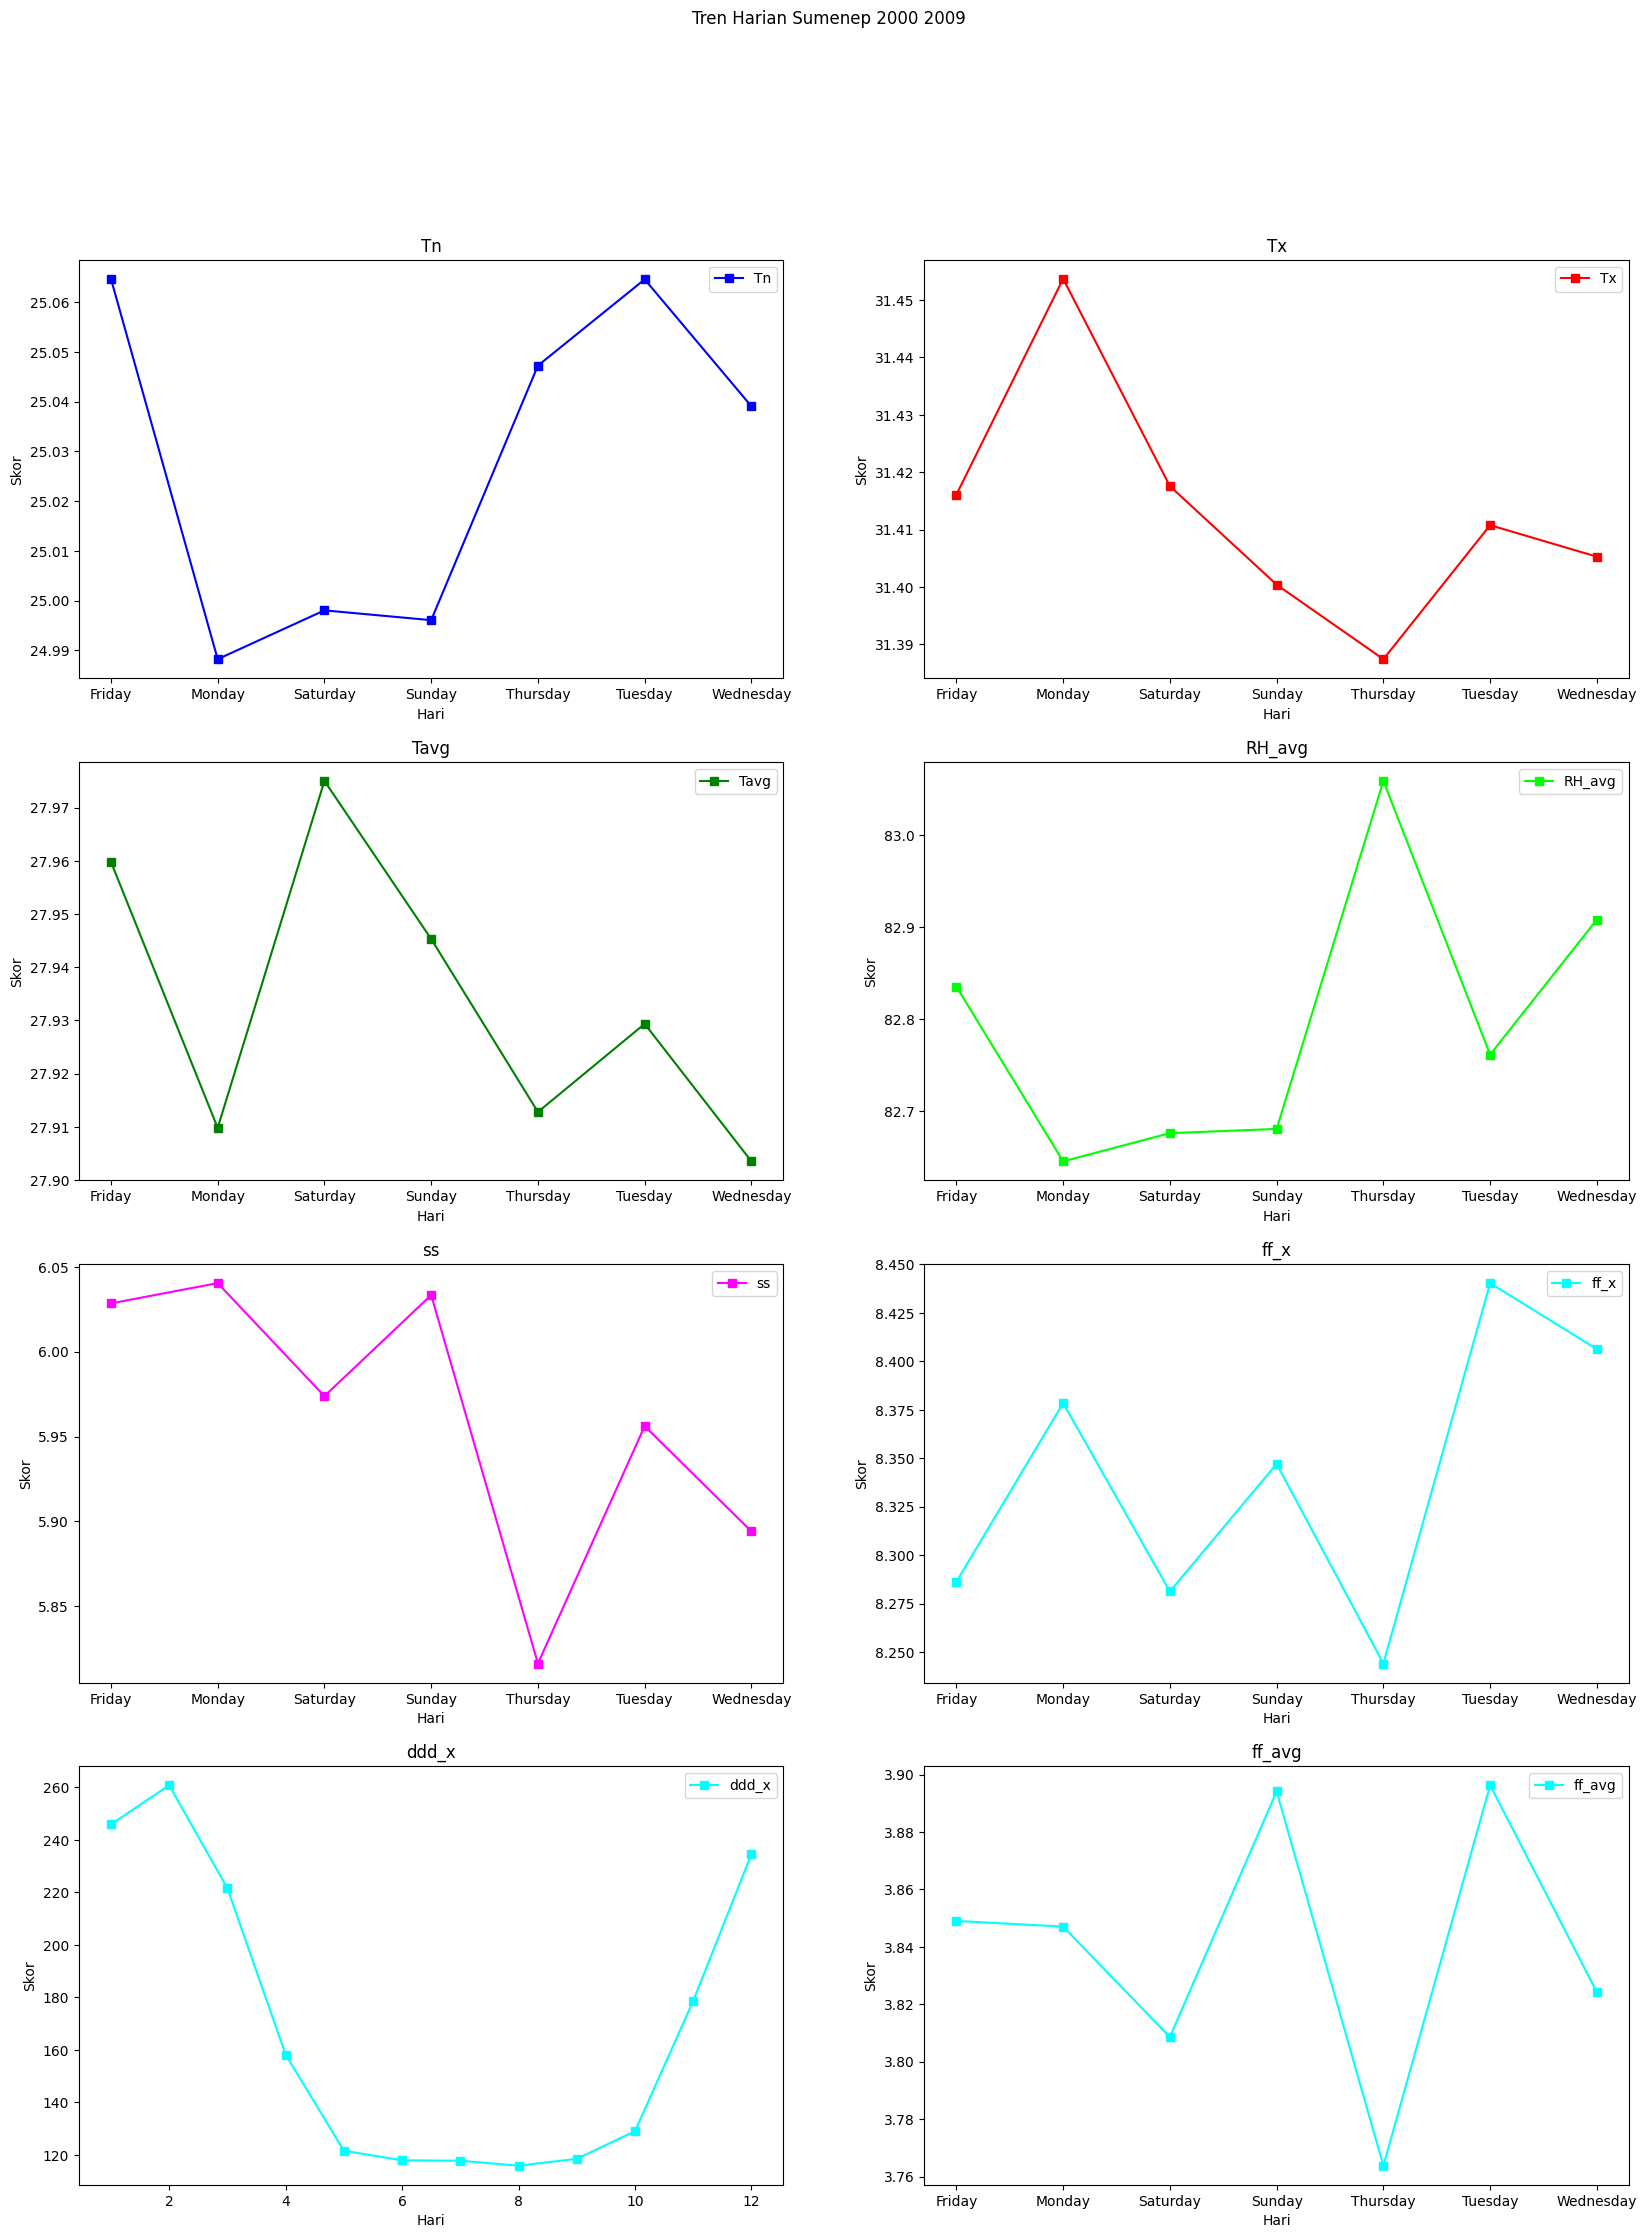

In [41]:
fig = plt.subplots (4, 2, figsize=(20,25))
plt.subplot(4, 2, 1)
data.groupby('Hari') ['Tn'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.title('Tn')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 2)
data.groupby ('Hari') ['Tx'].mean().plot(marker = 's', legend=True, color = 'red')
plt.title('Tx')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 3)
data.groupby ('Hari') ['Tavg'].mean().plot(marker = 's', legend=True, color = 'green')
plt.title('Tavg')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 4)
data.groupby('Hari') ['RH_avg'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.title('RH_avg')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 5)
data.groupby('Hari') ['ss'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.title('ss')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 6)
data.groupby('Hari') ['ff_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_x')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 7)
data.groupby('Bulan') ['ddd_x'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ddd_x')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(4, 2, 8)
data.groupby('Hari') ['ff_avg'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.title('ff_avg')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian Sumenep 2000 2009")
plt.show()